## 11-4. 포켓몬 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


In [3]:
import os

csv_path = os.getenv("HOME") + "/desktop/Aiffel/Becoming_Kaggler/Pokemon.csv"
original_data = pd.read_csv(csv_path)
print('슝=3')

슝=3


In [5]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [10]:
# legendary 포켓몬만 따로 DataFrame 만들기

legendary = pokemon[pokemon['Legendary'] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [13]:
# 일반 포켓몬만 따로 DataFrame 만들기

ordinary = pokemon[pokemon['Legendary'] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [16]:
# missing value 확인

pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [17]:
# columns 이해하기

print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [18]:
pokemon.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

##### #: ID number

In [22]:
len(set(pokemon['#']))

721

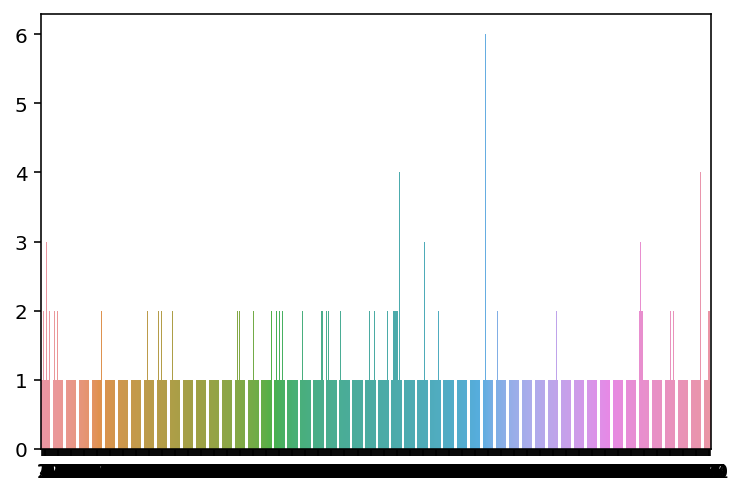

In [25]:
# DJ's practice

sns.barplot(x=pokemon['#'].value_counts().index, y=pokemon['#'].value_counts().values)

In [27]:
# '6' Id 포켓몬 확인해보기

pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [30]:
# 'Name' 컬럼 중복 여부 확인

len(set(pokemon['Name']))

800

##### Type 1 & Type 2 : 포켓몬의 속성

In [31]:
# 무작위로 확인해보기

pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [33]:
# Type1 과 Type2가 unique하게 몇 개씩 있는지 확인

len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

In [35]:
# DJ's practice

len(set(pokemon['Type 1'])),len(set(pokemon['Type 2'])) 

(18, 19)

In [38]:
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

In [40]:
# Type1과 Type2가 같은 걸 확인했고, Type을 따로 저장

types = list(set(pokemon['Type 1']))

print(len(types))
print(types)

18
['Bug', 'Ice', 'Steel', 'Poison', 'Ground', 'Dragon', 'Electric', 'Rock', 'Dark', 'Psychic', 'Grass', 'Fairy', 'Normal', 'Flying', 'Ghost', 'Water', 'Fighting', 'Fire']


In [46]:
# type을 1개만 갖고 있는 포켓몬 개수

pokemon['Type 2'].isnull().sum()

386

In [47]:
# DJ's practice to see whether isna() and isnull() are the same

pokemon['Type 2'].isna().sum()

386

##### Type 1 데이터 분포 plot

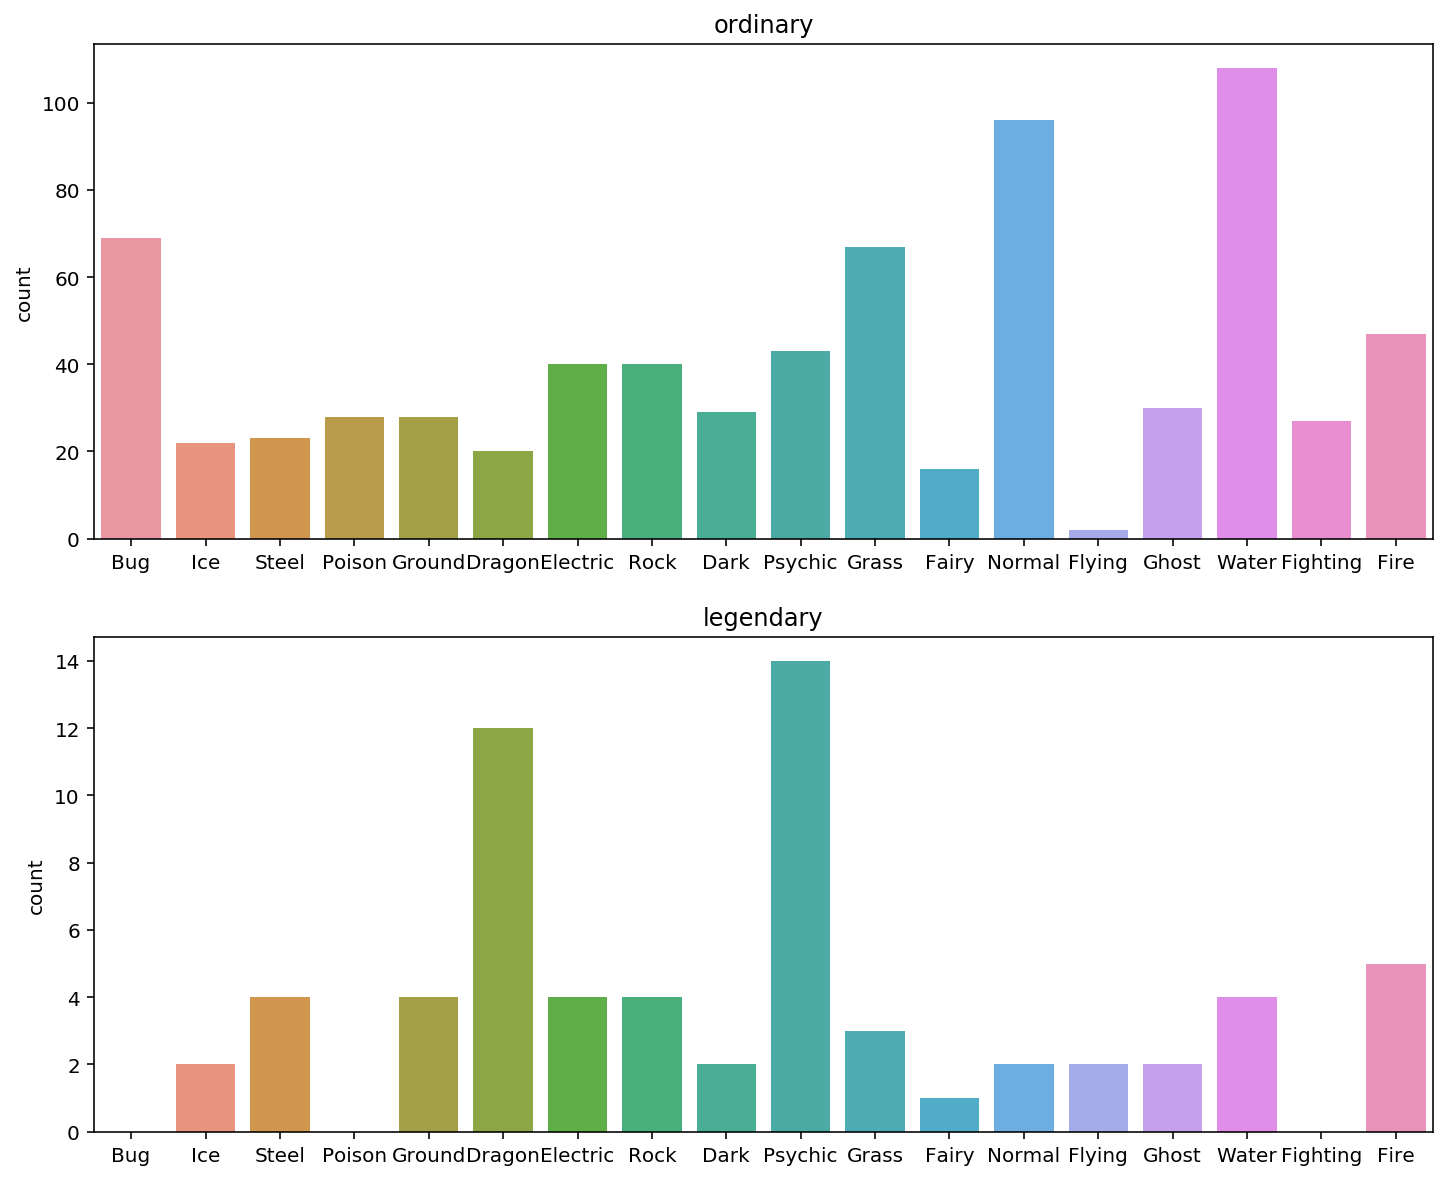

In [58]:
# DJ's practice

fig = plt.figure(figsize=(12,10))

# plt.subplot(2,1,1)
# sns.countplot(data=ordinary, x='Type 1', order=types).set_xlabel('')
# plt.title("Ordinary pokemons' types")

# plt.subplot(2,1,2)
# sns.countplot(data=legendary, x='Type 1', order=types).set_xlabel("")
# plt.title("Legendary pokemons'types")

# plt.show()
          
ax1 = fig.add_subplot(2,1,1)
sns.countplot(data=ordinary, x='Type 1', order=types, ax=ax1).set_xlabel('')
ax1.set_title('ordinary')

ax2 = fig.add_subplot(2,1,2)
sns.countplot(data=legendary, x='Type 1', order=types, ax=ax2).set_xlabel('')
ax2.set_title('legendary')

plt.show()

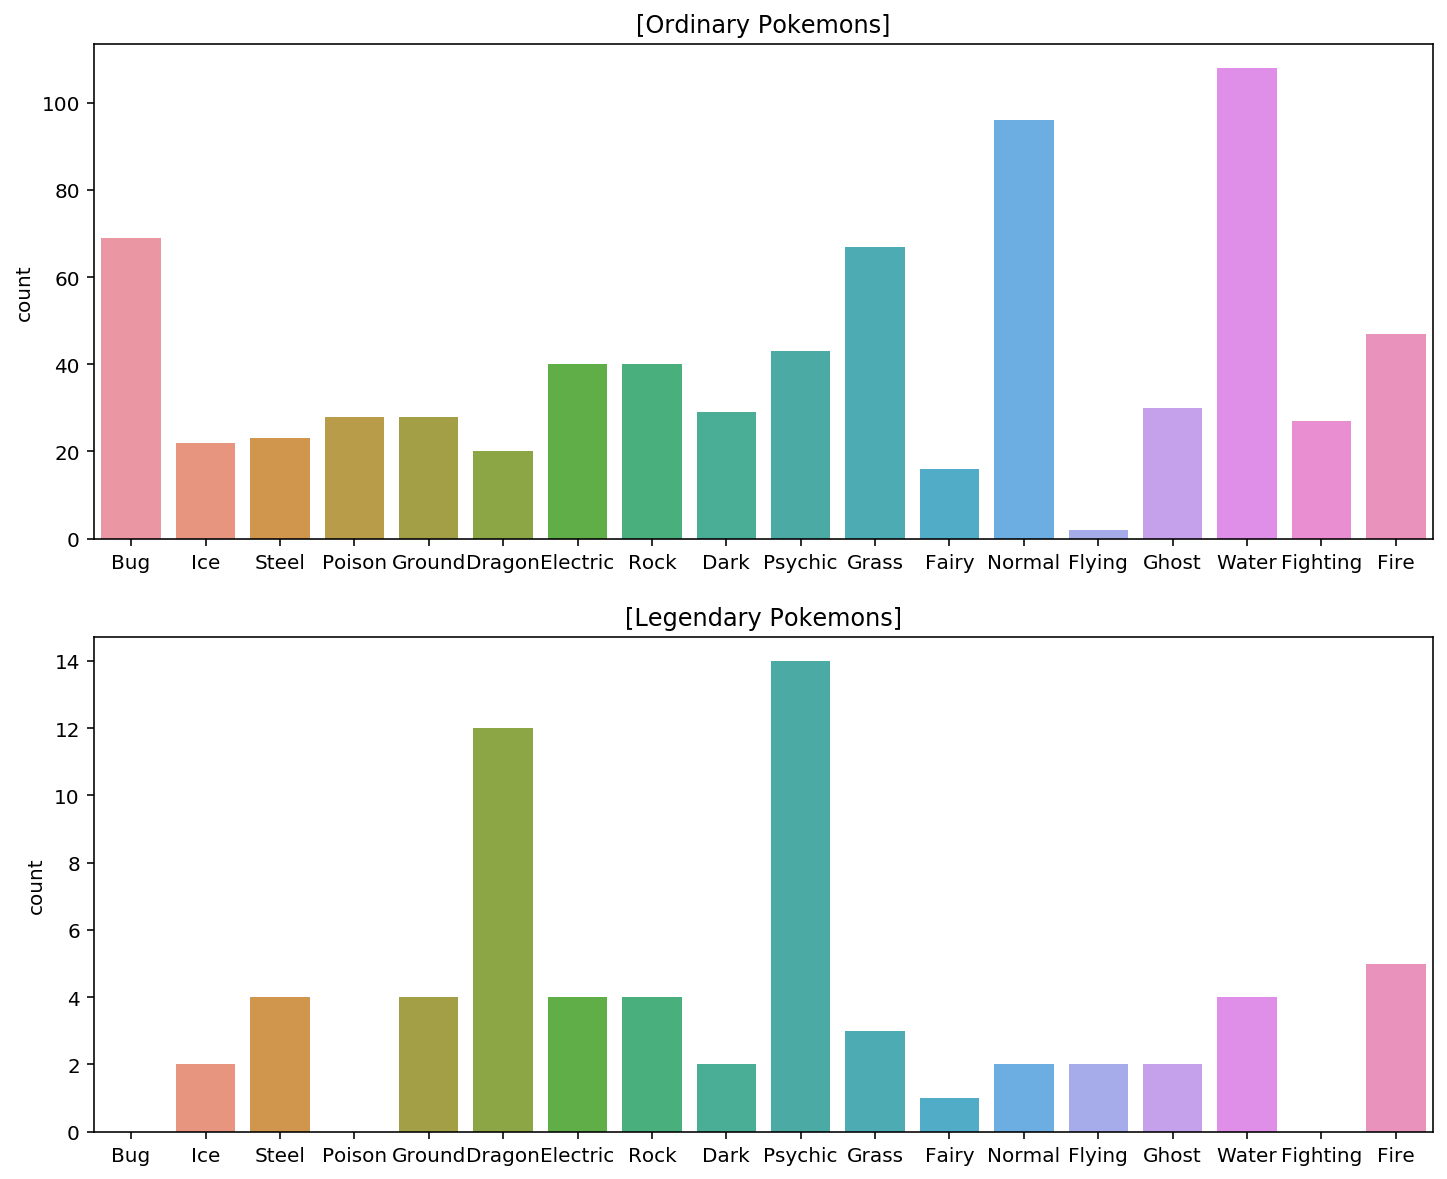

In [49]:
plt.figure(figsize=(12, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [59]:
# pivot table로 legendary 포켓몬 타입별 비중 확인

# Type1별로 Legendary 의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


In [89]:
# DJ's practice

print(legendary['Type 1'].value_counts())
print("==================================")
print(legendary['Type 2'].value_counts())

Psychic     14
Dragon      12
Fire         5
Water        4
Rock         4
Electric     4
Ground       4
Steel        4
Grass        3
Ghost        2
Flying       2
Normal       2
Dark         2
Ice          2
Fairy        1
Name: Type 1, dtype: int64
Flying      13
Psychic      5
Fighting     4
Dragon       4
Fire         3
Ice          3
Fairy        2
Water        1
Ghost        1
Dark         1
Electric     1
Ground       1
Steel        1
Name: Type 2, dtype: int64


In [76]:
# DJ's practice

legendary['Type 1'].value_counts().sum()

65

In [77]:
# DJ's practice

legendary['Type 2'].value_counts().sum()

40

In [79]:
# DJ's practice

legendary['Type 2'].isnull().sum()

25

In [88]:
# DJ's practice

legendary[(legendary['Type 1'] == 'Flying') | (legendary['Type 2'] == 'Flying')].reset_index(drop=True)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
4,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
5,384,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,True
6,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
7,492,ShayminSky Forme,Grass,Flying,600,100,103,75,120,75,127,4,True
8,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
9,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True


##### Type 2 데이터 분포 plot

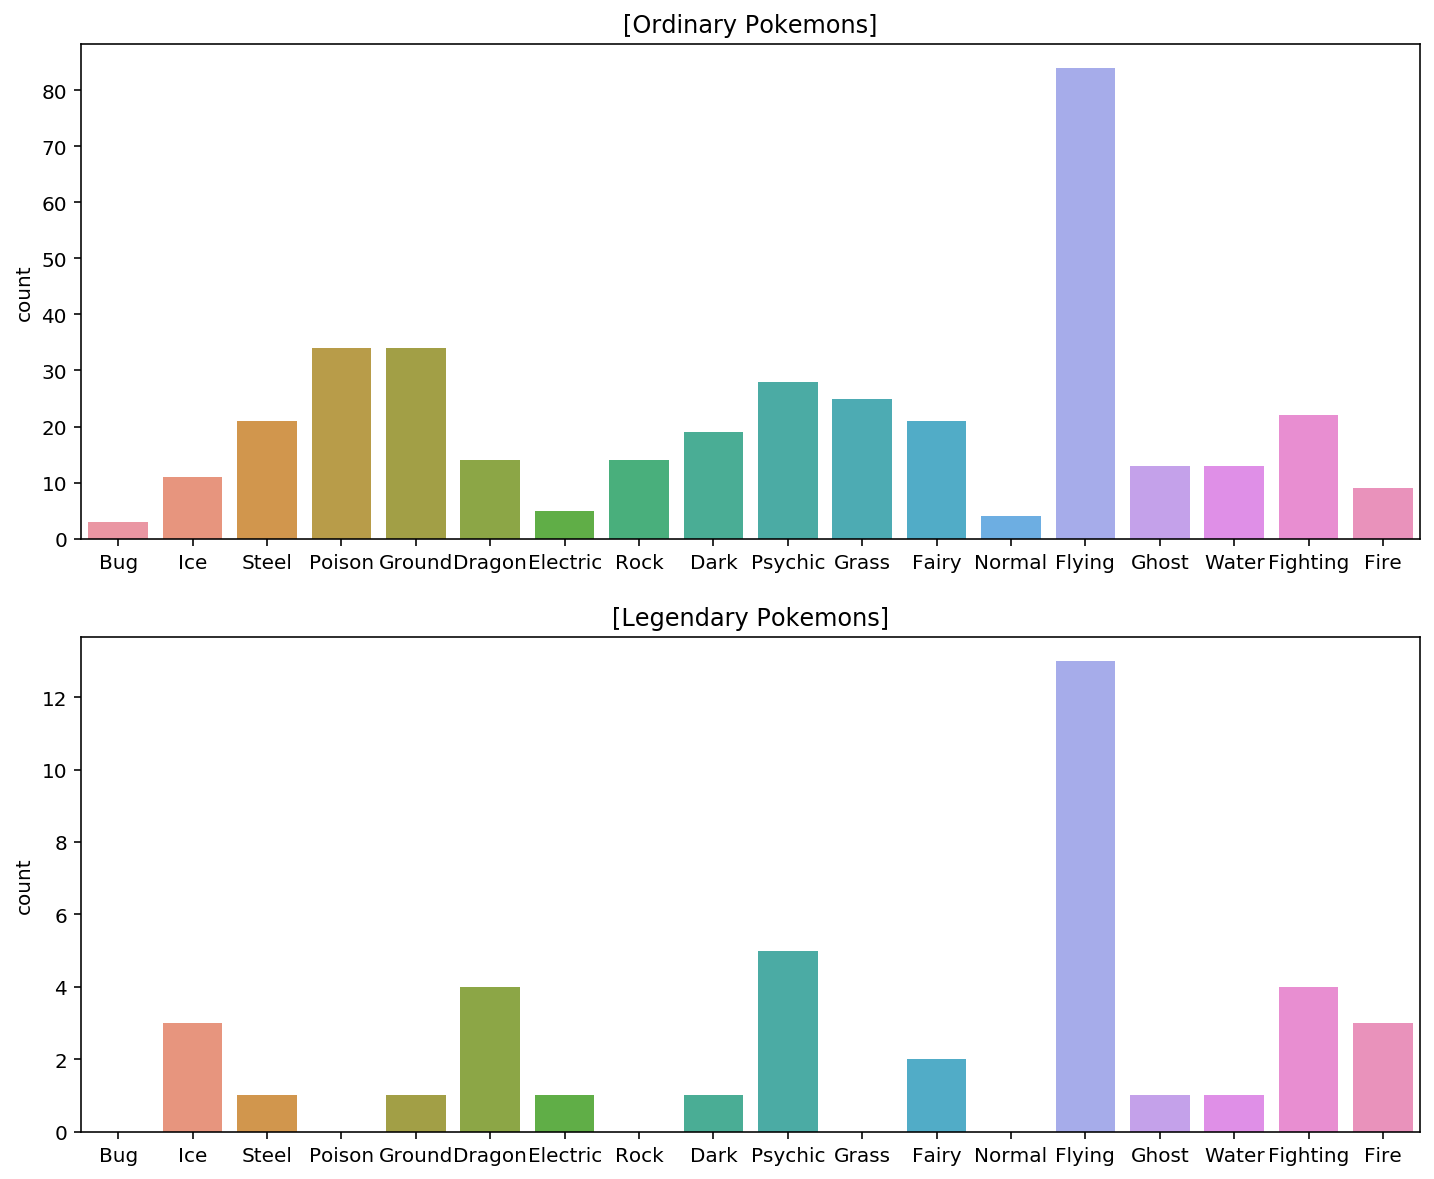

In [90]:
plt.figure(figsize=(12, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [91]:
# Type2별로 Legendary 의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


##### Total : 모든 스탯의 총합

In [92]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [93]:
print("#0 pokemon: {}\n".format(pokemon.loc[0, "Name"]))
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon: Bulbasaur

total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [99]:
# Total과 stats의 합의 값이 같은 포켓몬의 갯수가 전체인지 확인하기

sum(pokemon['Total'].values == pokemon[stats].values.sum(axis=1))

800

In [107]:
pokemon['Total'].values == pokemon[stats].values.sum(axis=1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

##### Total값에 따른 분포 plot

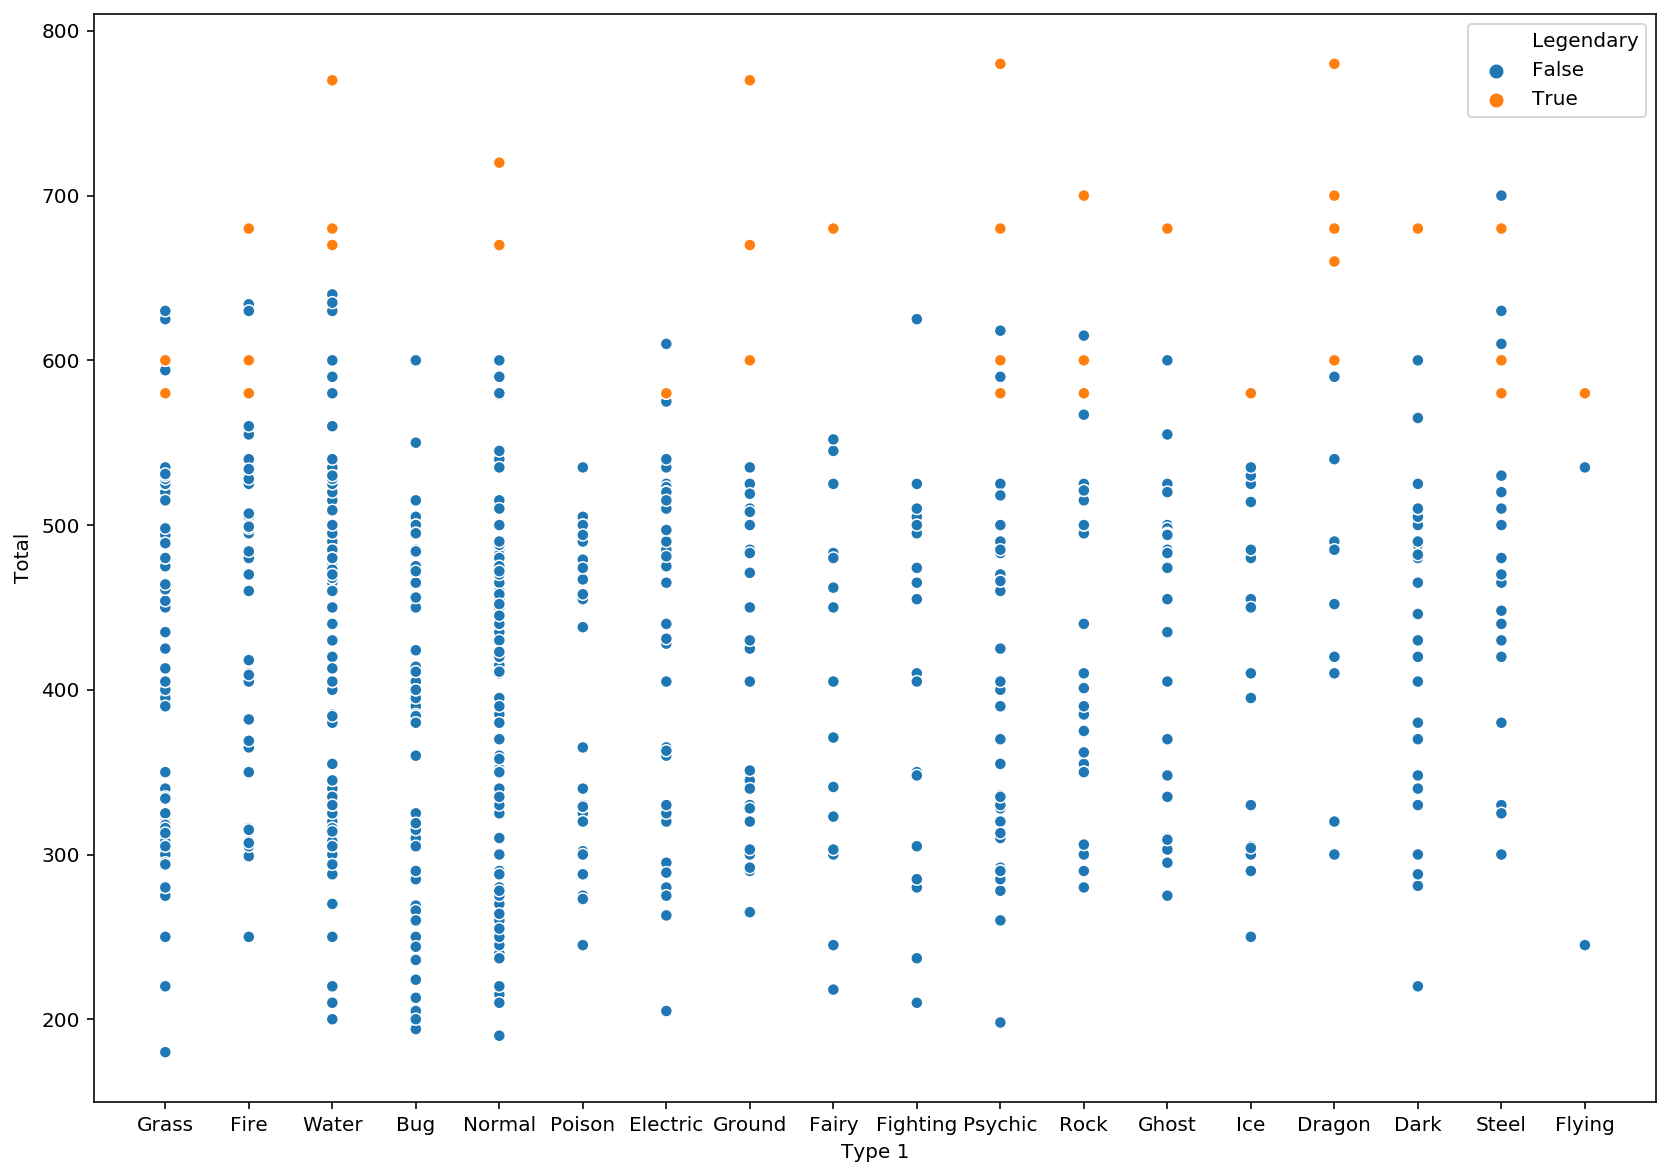

In [110]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

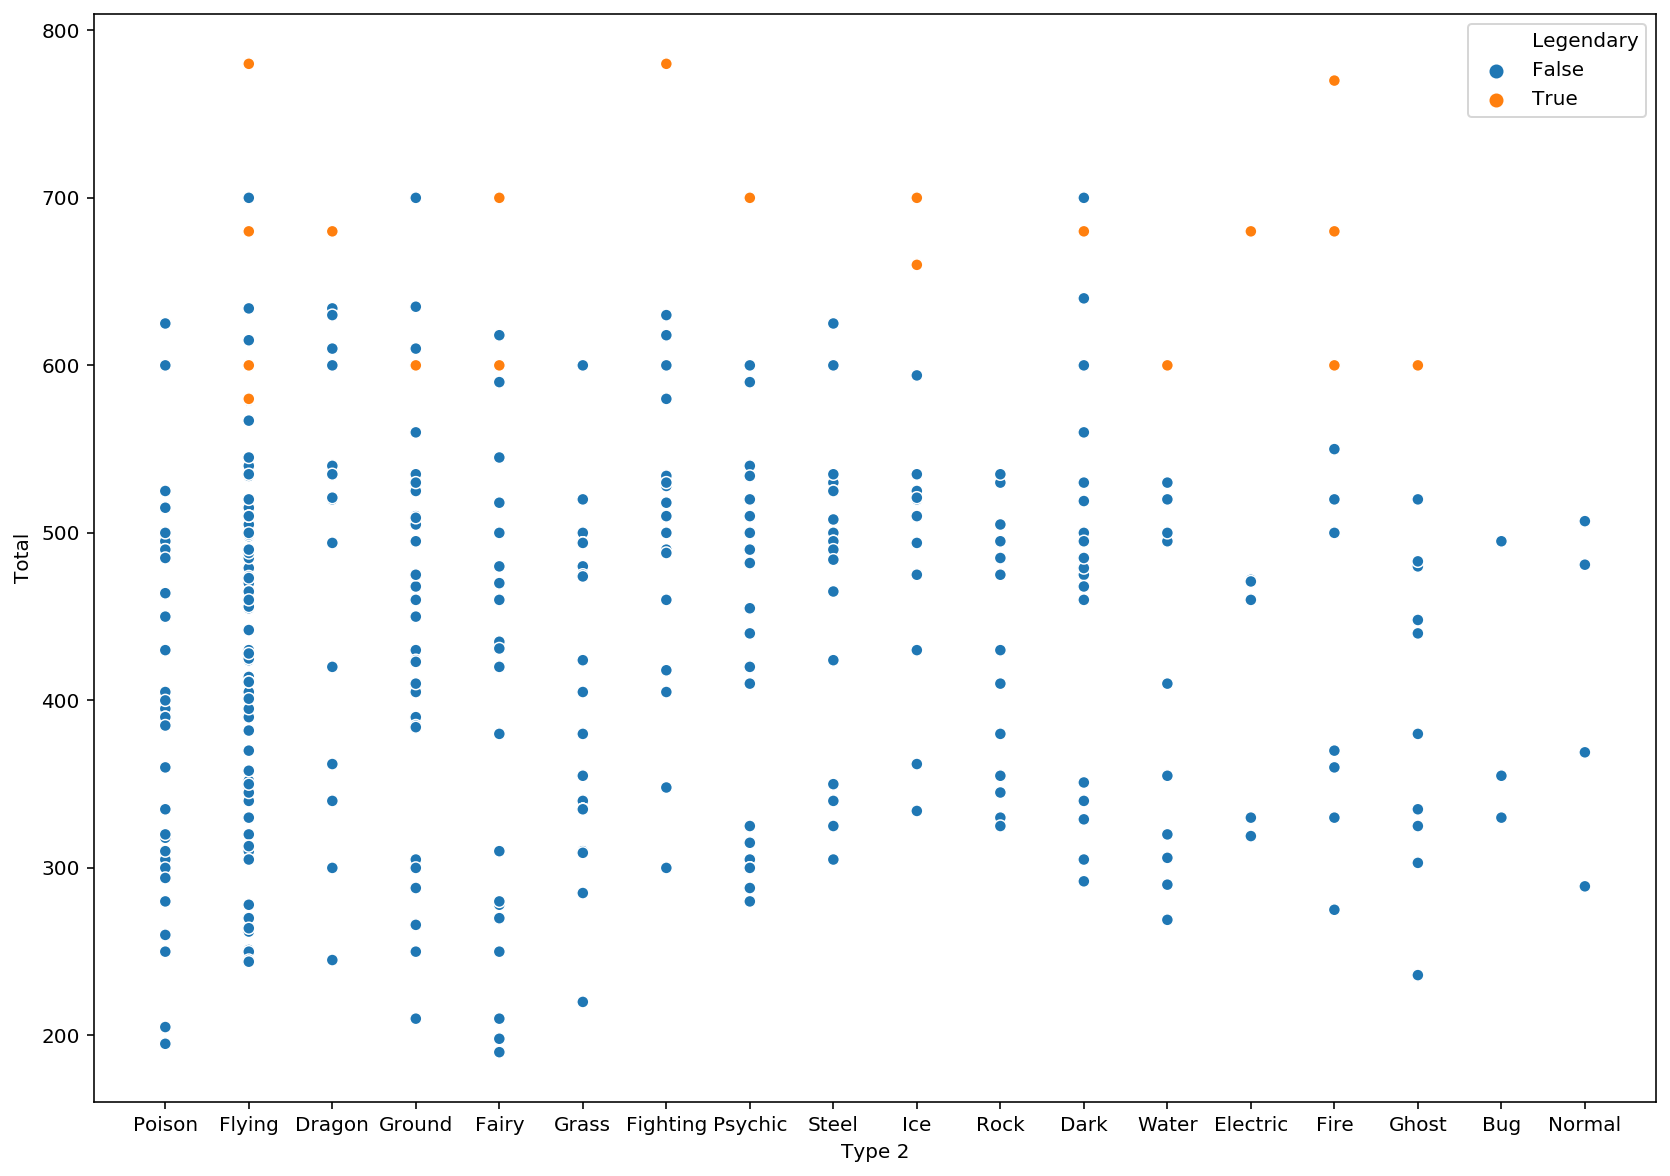

In [111]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 2", y="Total", hue="Legendary")
plt.show()

##### 세부스탯: HP, Attack, Defense, Sp. Atk, Sp. Def, Speed

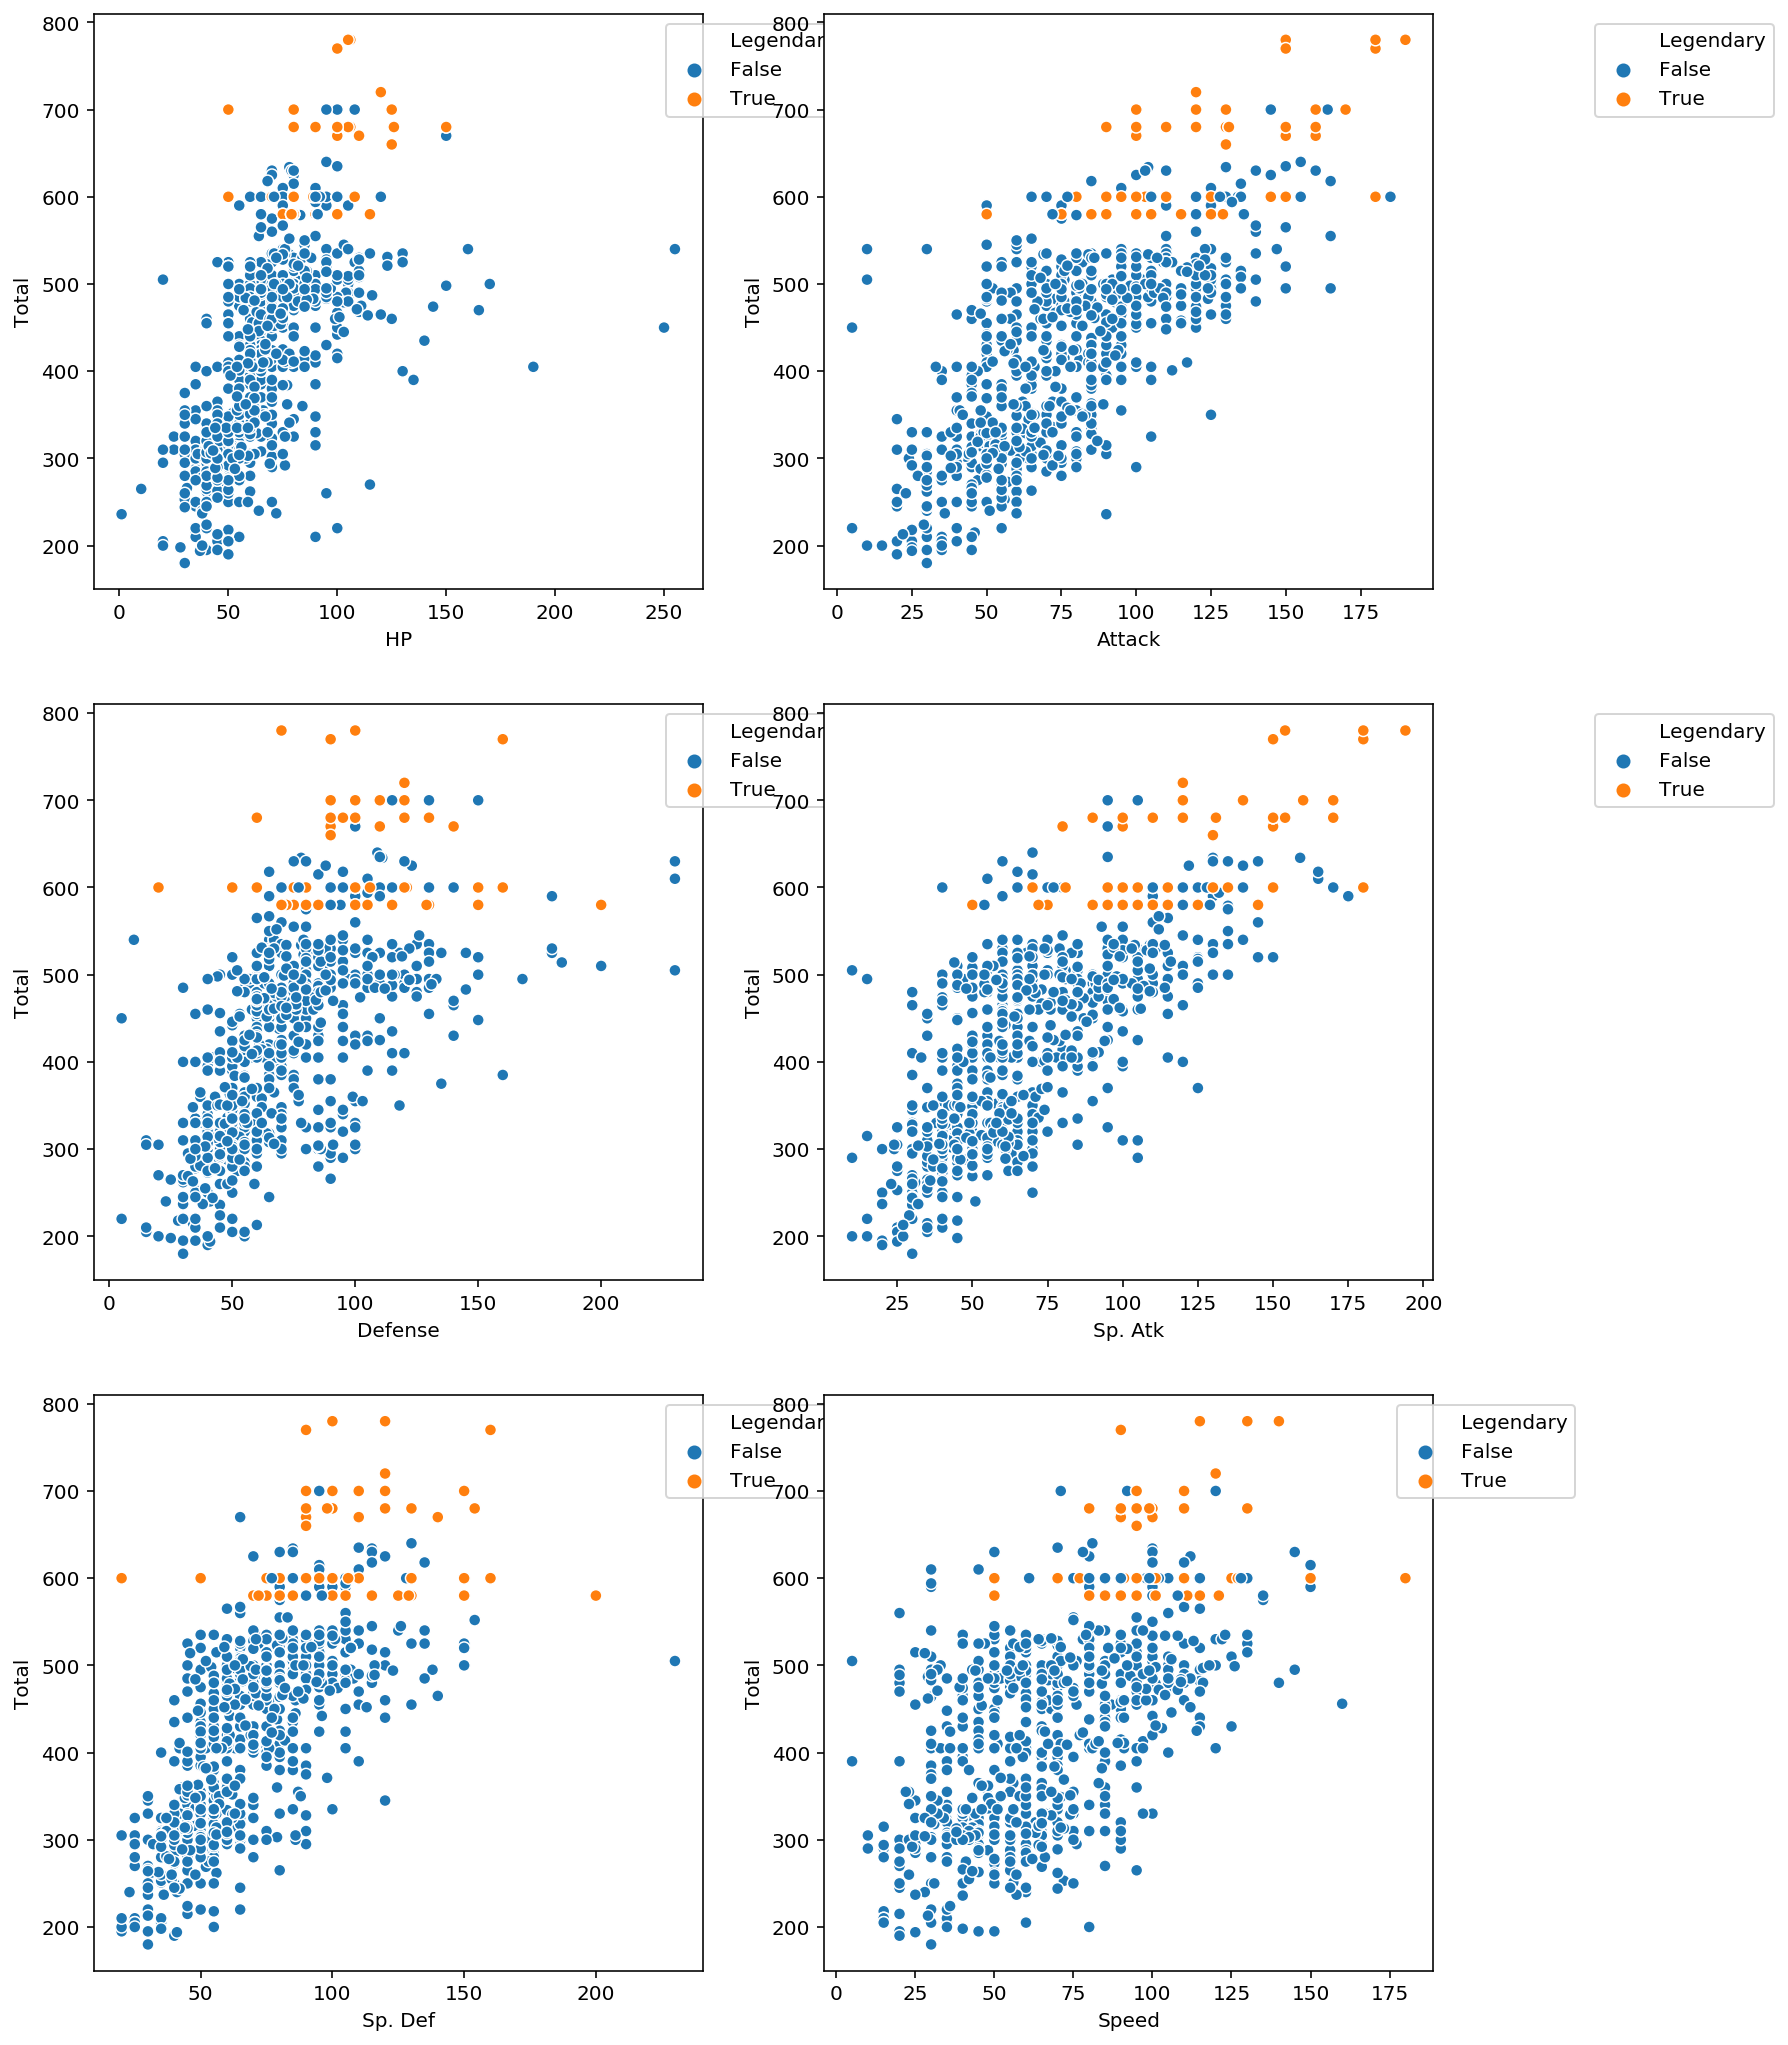

In [122]:
# # DJ's practice

# fig1, [(ax11, ax12), (ax21, ax22), (ax31, ax32)] = plt.subplots(nrows=3, ncols=2)
# fig1.set_size_inches(12,18)

# sns.scatterplot(data=pokemon, y='Total', x='HP', hue='Legendary', ax=ax11).legend(bbox_to_anchor=(1.25,1))
# sns.scatterplot(data=pokemon, y='Total', x='Attack', hue='Legendary', ax=ax12).legend(bbox_to_anchor=(1.25,1))
# sns.scatterplot(data=pokemon, y='Total', x='Defense', hue='Legendary', ax=ax21).legend(bbox_to_anchor=(1.25,1))
# sns.scatterplot(data=pokemon, y='Total', x='Sp. Atk', hue='Legendary', ax=ax22).legend(bbox_to_anchor=(1.25,1))
# sns.scatterplot(data=pokemon, y='Total', x='Sp. Def', hue='Legendary', ax=ax31).legend(bbox_to_anchor=(1.25,1))
# sns.scatterplot(data=pokemon, y='Total', x='Speed', hue='Legendary', ax=ax32).legend(bbox_to_anchor=(1.25,1))
# plt.show()

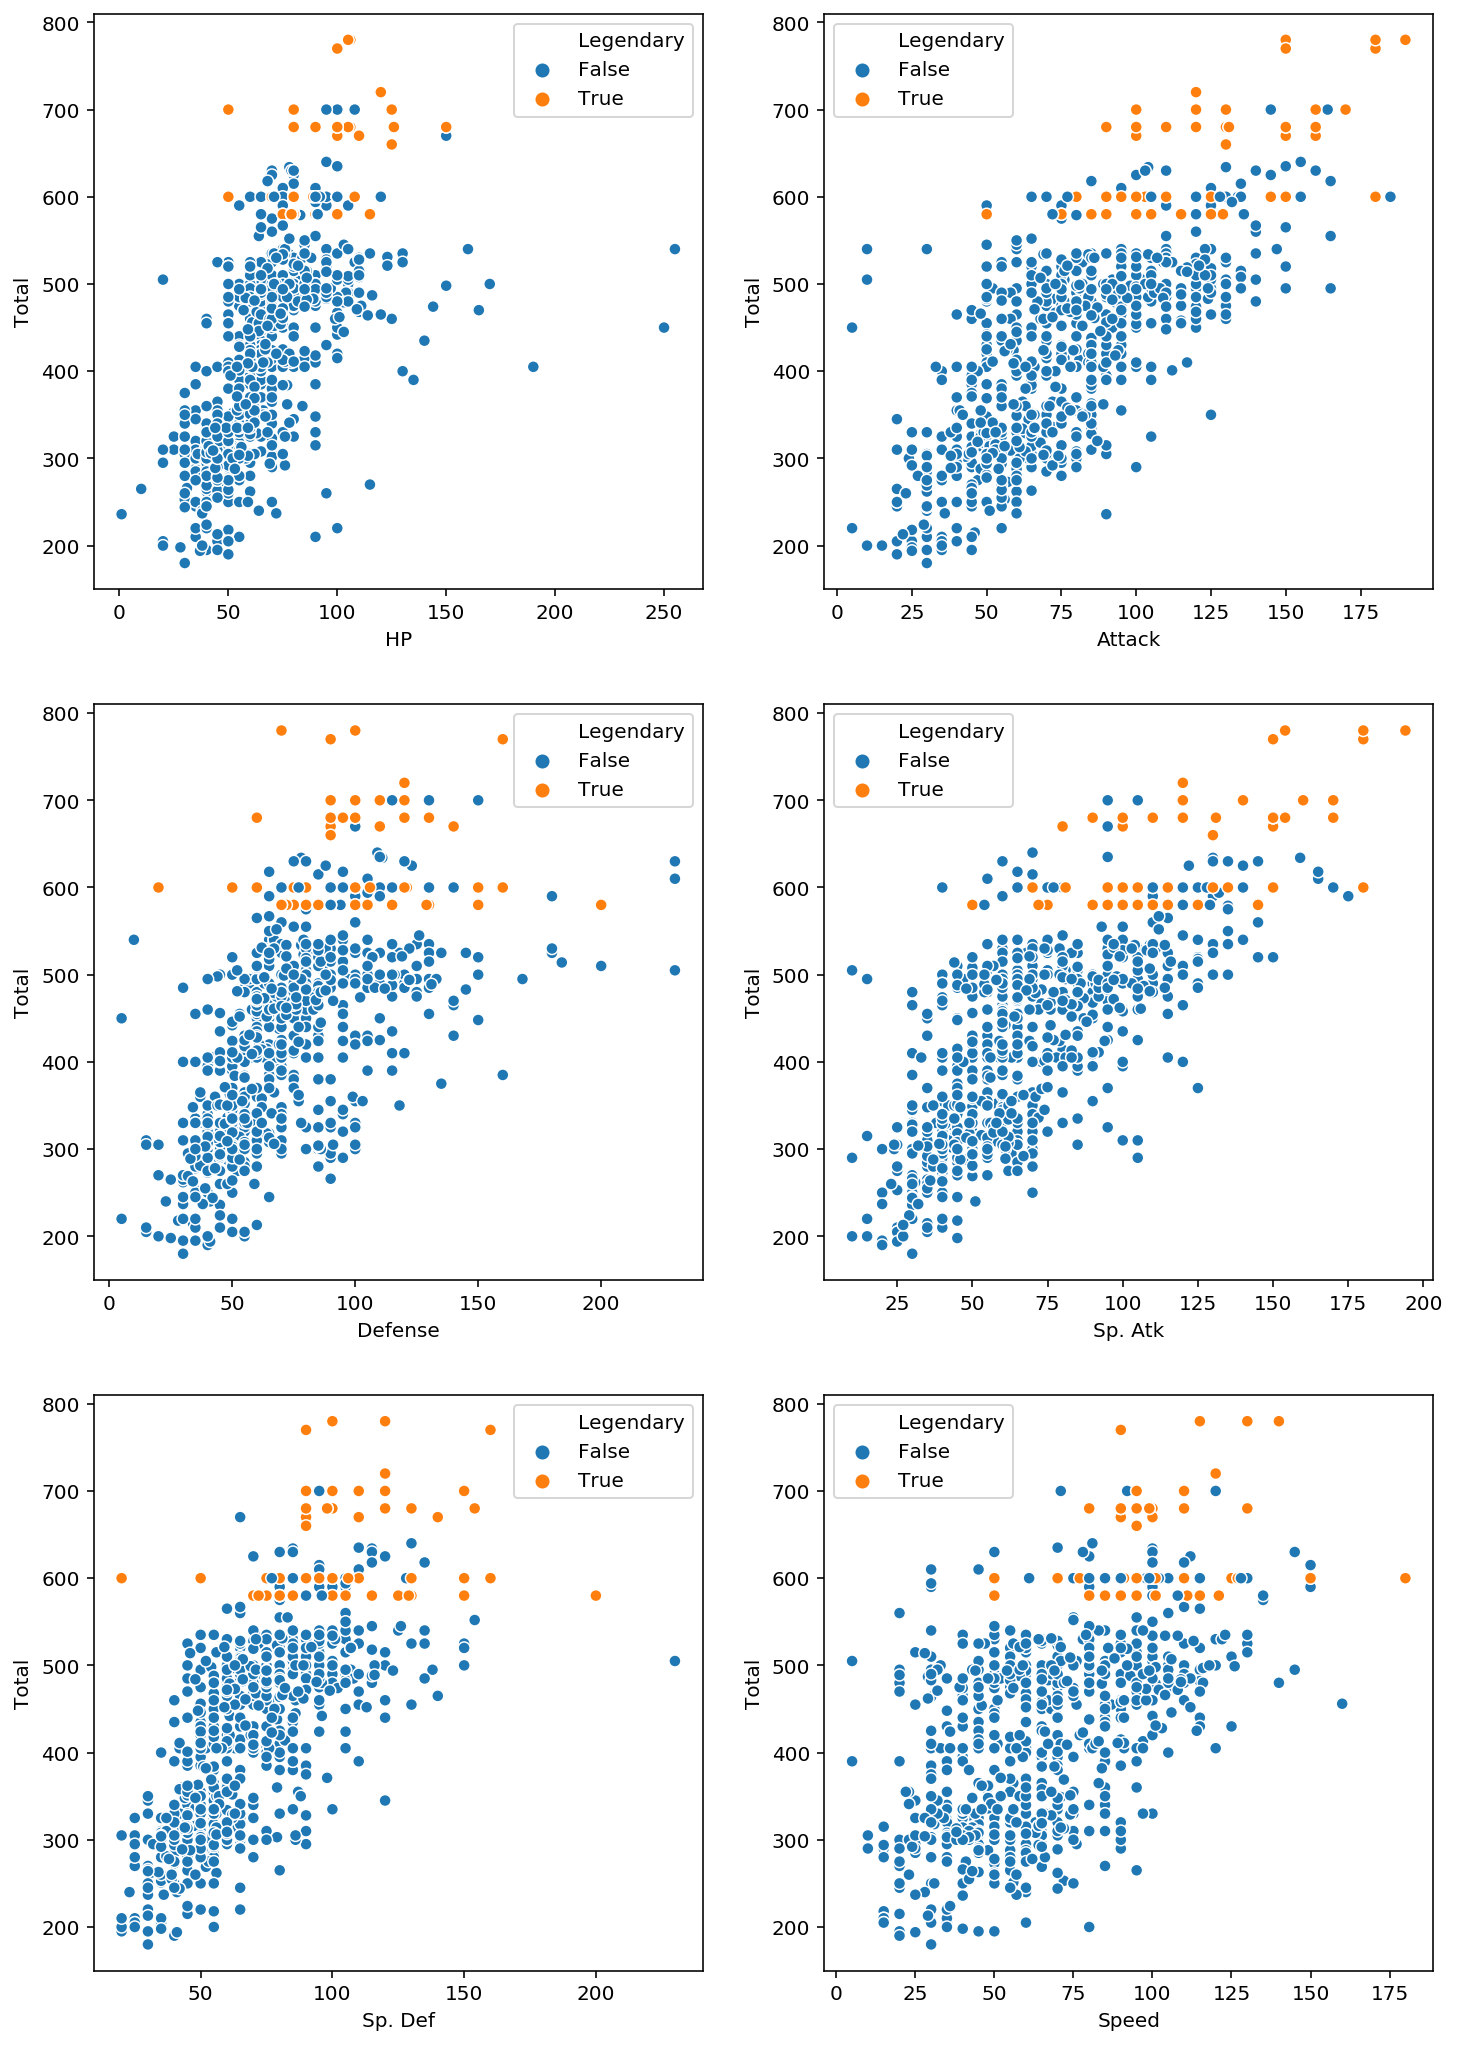

In [112]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)
plt.show()

##### Generation : 포켓몬의 세대

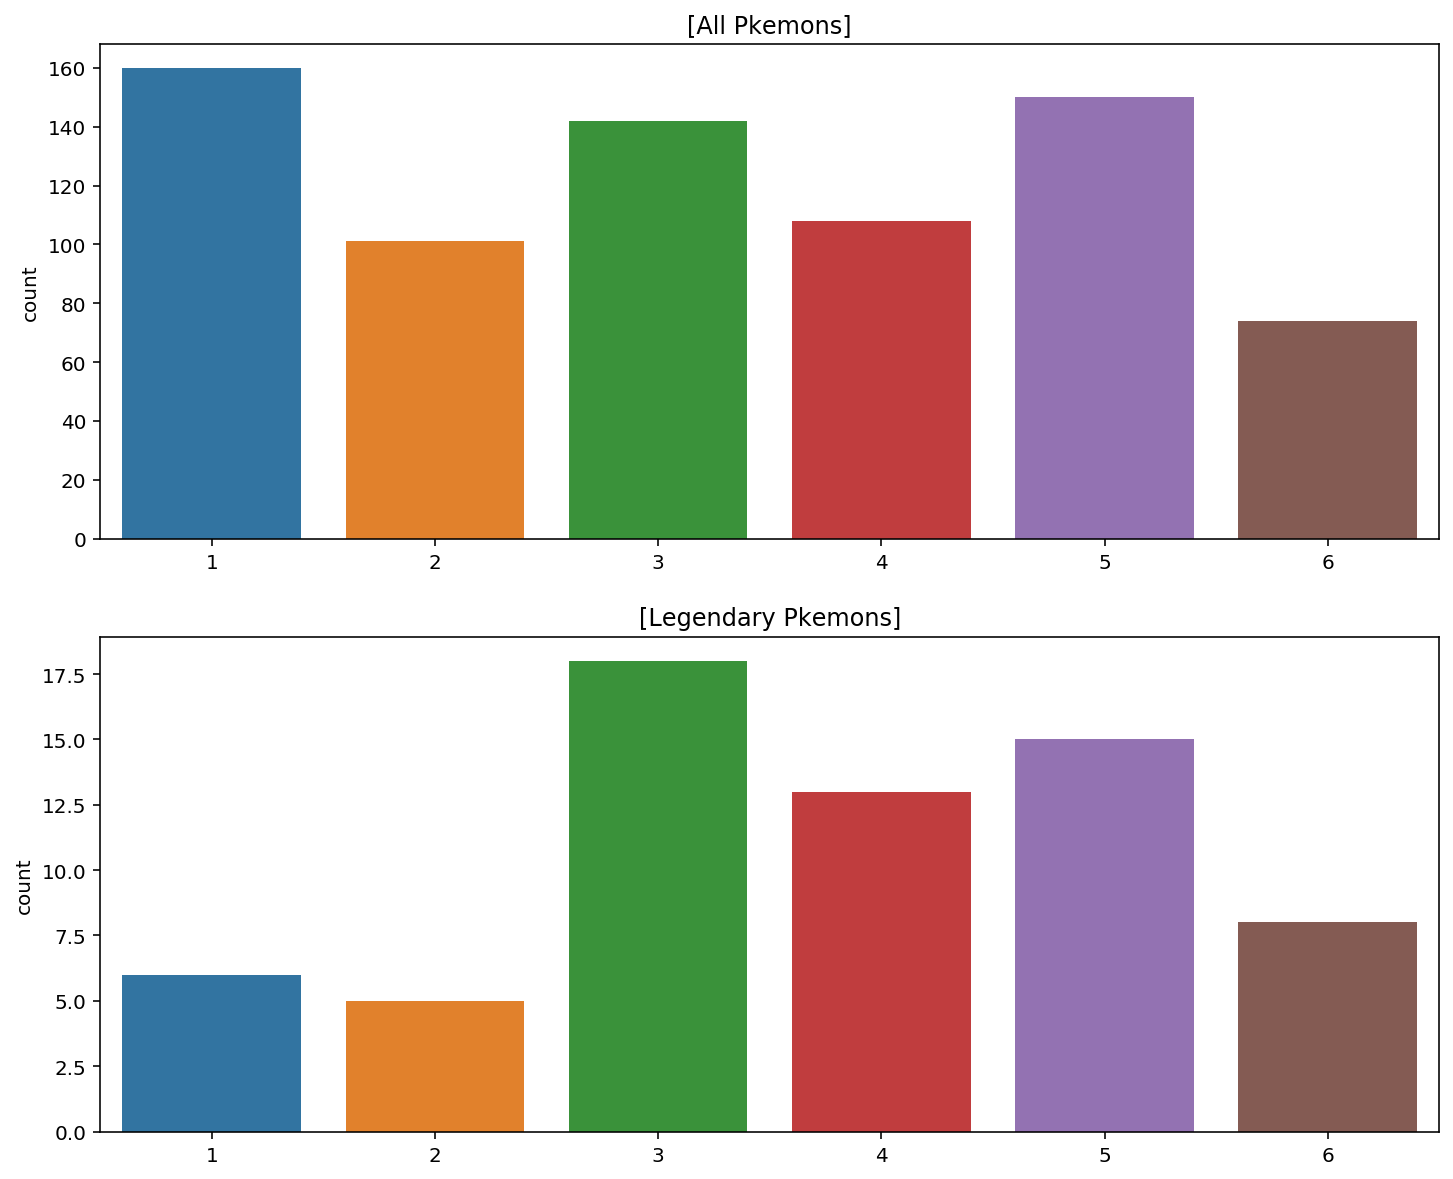

In [113]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[All Pkemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pkemons]")
plt.show()

# 12. 🦄가랏, 몬스터볼! 전설의 포켓몬 찾아 삼만리(2) - 데이터 전처리하기

In [1]:
# 종료 후 다시 라이브러리, 데이터 불러오기

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

csv_path = os.getenv("HOME") +"/desktop/Aiffel/Becoming_Kaggler/Pokemon.csv"
original_data = pd.read_csv(csv_path)
pokemon = original_data.copy()

legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)

types = list(set(pokemon["Type 1"]))
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

print('슝=3')

슝=3


##### 전설의 포켓몬의 Total값

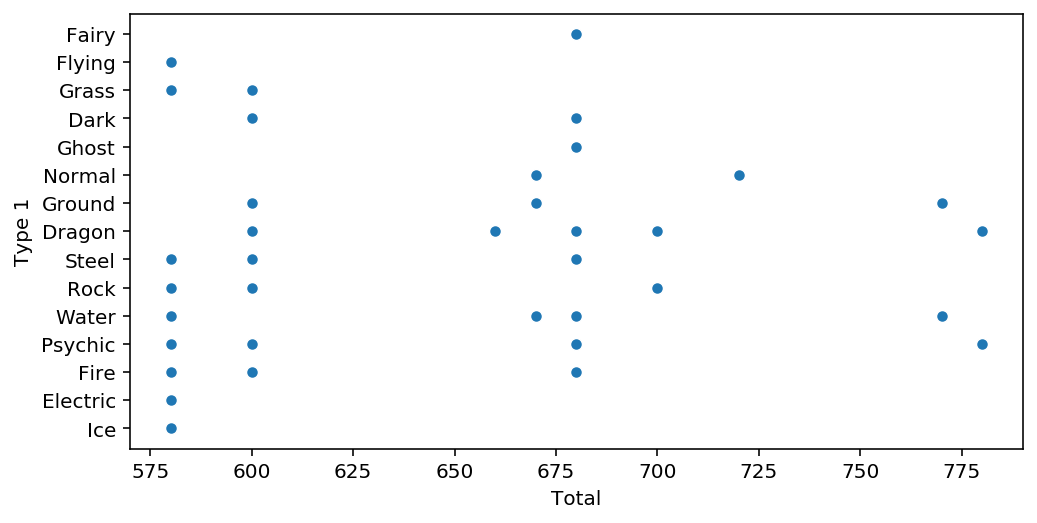

In [2]:
# total 값 확인

fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

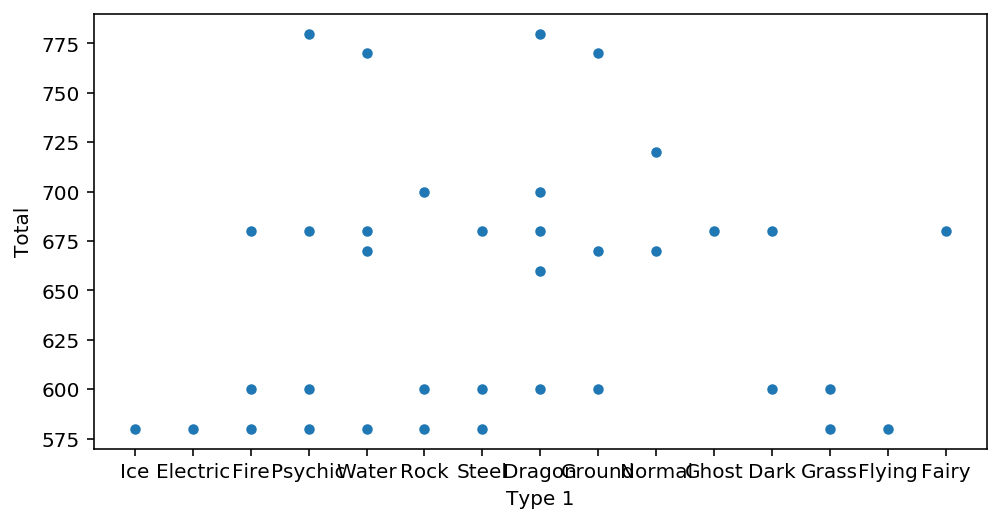

In [4]:
# DJ's practice, x <-> y axis changed

fig1, ax1 = plt.subplots()
fig1.set_size_inches(8,4)

sns.scatterplot(data=legendary, x='Type 1', y='Total')
plt.show()

In [5]:
# Total unique 값 확인

print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


In [7]:
a = list(set(legendary["Total"]))
a

[770, 580, 680, 780, 720, 660, 600, 700, 670]

In [11]:
a

[580, 600, 660, 670, 680, 700, 720, 770, 780]

In [13]:
b = list(set(legendary["Total"]))

In [14]:
sorted(b)

[580, 600, 660, 670, 680, 700, 720, 770, 780]

In [15]:
b

[770, 580, 680, 780, 720, 660, 600, 700, 670]

In [16]:
a

[580, 600, 660, 670, 680, 700, 720, 770, 780]

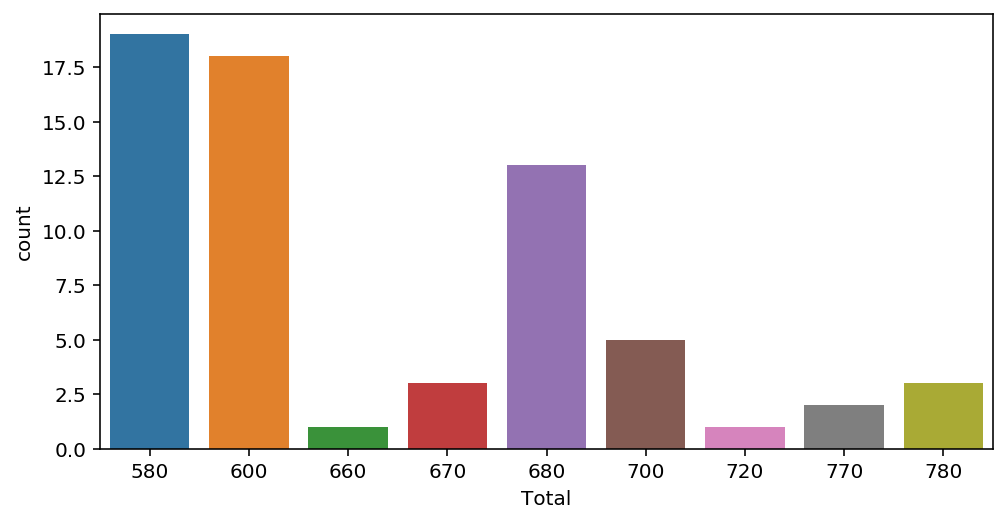

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [19]:
# 하나의 Total 값당 포켓몬 종류 수는 많은 것 같다

round(65 / 9, 2)

7.22

In [32]:
# 그렇다면 ordinary 포켓몬은?

print(sorted(list(set(ordinary["Total"]))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


In [33]:
len(sorted(list(set(ordinary["Total"]))))

195

In [34]:
round(735 / 195, 2)

3.77

In [25]:
# 그렇다면 ordinary 포켓몬은?

o_li = sorted(list(set(ordinary['Total'])))
o_li

[180,
 190,
 194,
 195,
 198,
 200,
 205,
 210,
 213,
 215,
 218,
 220,
 224,
 236,
 237,
 240,
 244,
 245,
 250,
 251,
 253,
 255,
 260,
 262,
 263,
 264,
 265,
 266,
 269,
 270,
 273,
 275,
 278,
 280,
 281,
 285,
 288,
 289,
 290,
 292,
 294,
 295,
 299,
 300,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 313,
 314,
 315,
 316,
 318,
 319,
 320,
 323,
 325,
 328,
 329,
 330,
 334,
 335,
 336,
 340,
 341,
 345,
 348,
 349,
 350,
 351,
 352,
 355,
 358,
 360,
 362,
 363,
 365,
 369,
 370,
 371,
 375,
 380,
 382,
 384,
 385,
 390,
 395,
 400,
 401,
 405,
 409,
 410,
 411,
 413,
 414,
 415,
 418,
 420,
 423,
 424,
 425,
 428,
 430,
 431,
 435,
 438,
 440,
 442,
 445,
 446,
 448,
 450,
 452,
 454,
 455,
 456,
 458,
 460,
 461,
 462,
 464,
 465,
 466,
 467,
 468,
 470,
 471,
 472,
 473,
 474,
 475,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 487,
 488,
 489,
 490,
 494,
 495,
 497,
 498,
 499,
 500,
 505,
 507,
 508,
 509,
 510,
 514,
 515,
 518,
 519,
 520,
 521,
 523,
 525,
 528

In [31]:
ordinary['Total'].value_counts()
print(len(o_li))
print(len(ordinary['Total']))
print(round(len(ordinary['Total'])/len(o_li), 2))

195
735
3.77


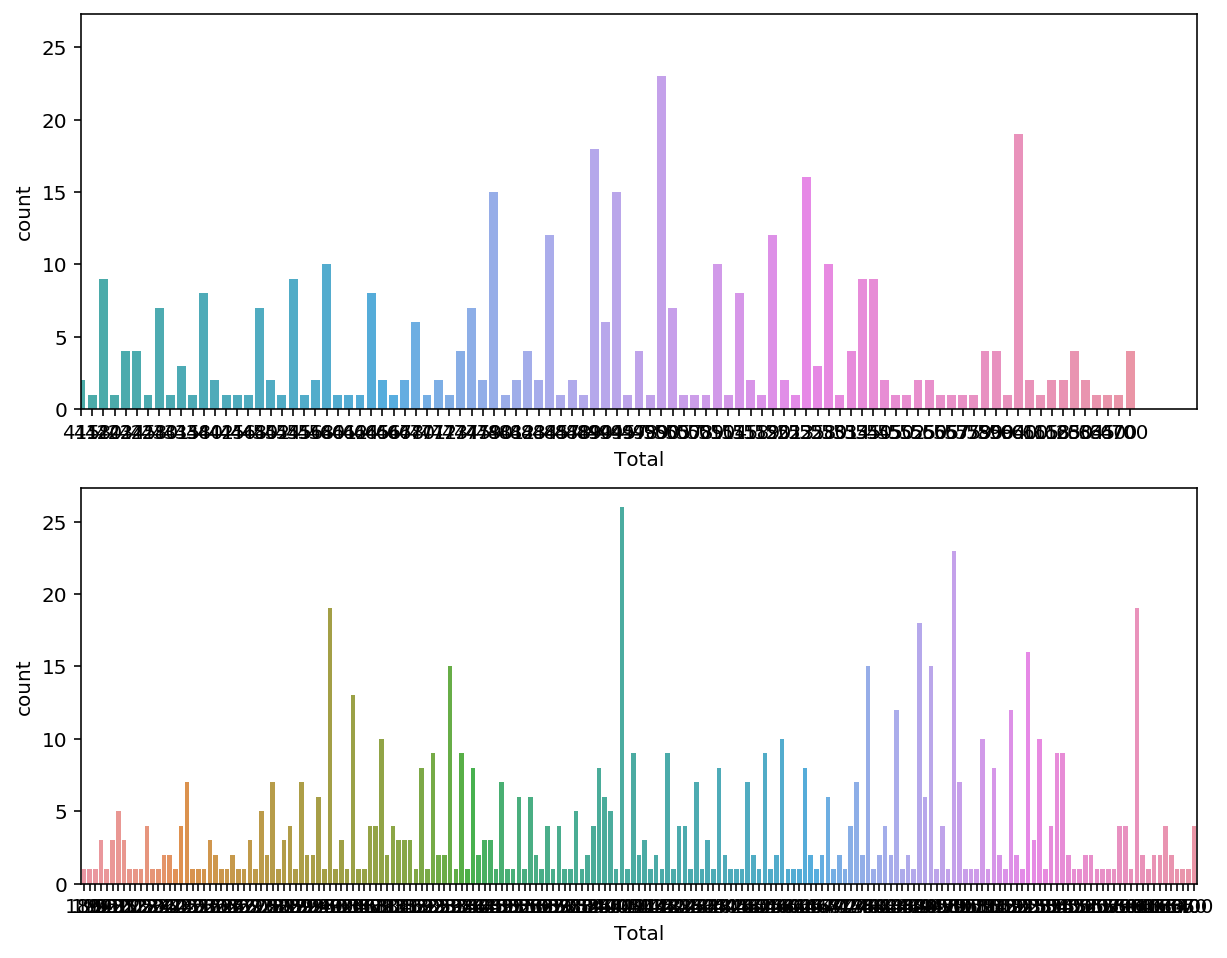

In [47]:
# DJ's practice to show two countplots

fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(10,8)
sns.countplot(data=ordinary, x='Total', ax=ax1)
ax1.set_xlim(100,200)

sns.countplot(data=ordinary, x='Total', ax=ax2)

plt.show()

### 12-3. 전설의 포켓몬과 일반 포켓몬, 그 차이는? (2) 이름

In [48]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [59]:
# DJ's practice
list('n'+str(x) for x  in range(1,6))

['n1', 'n2', 'n3', 'n4', 'n5']

In [60]:
# 이름에 forme가 많이 들어가더라

formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


In [61]:
# 이름이 길더라

legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))    
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [71]:
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))    
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


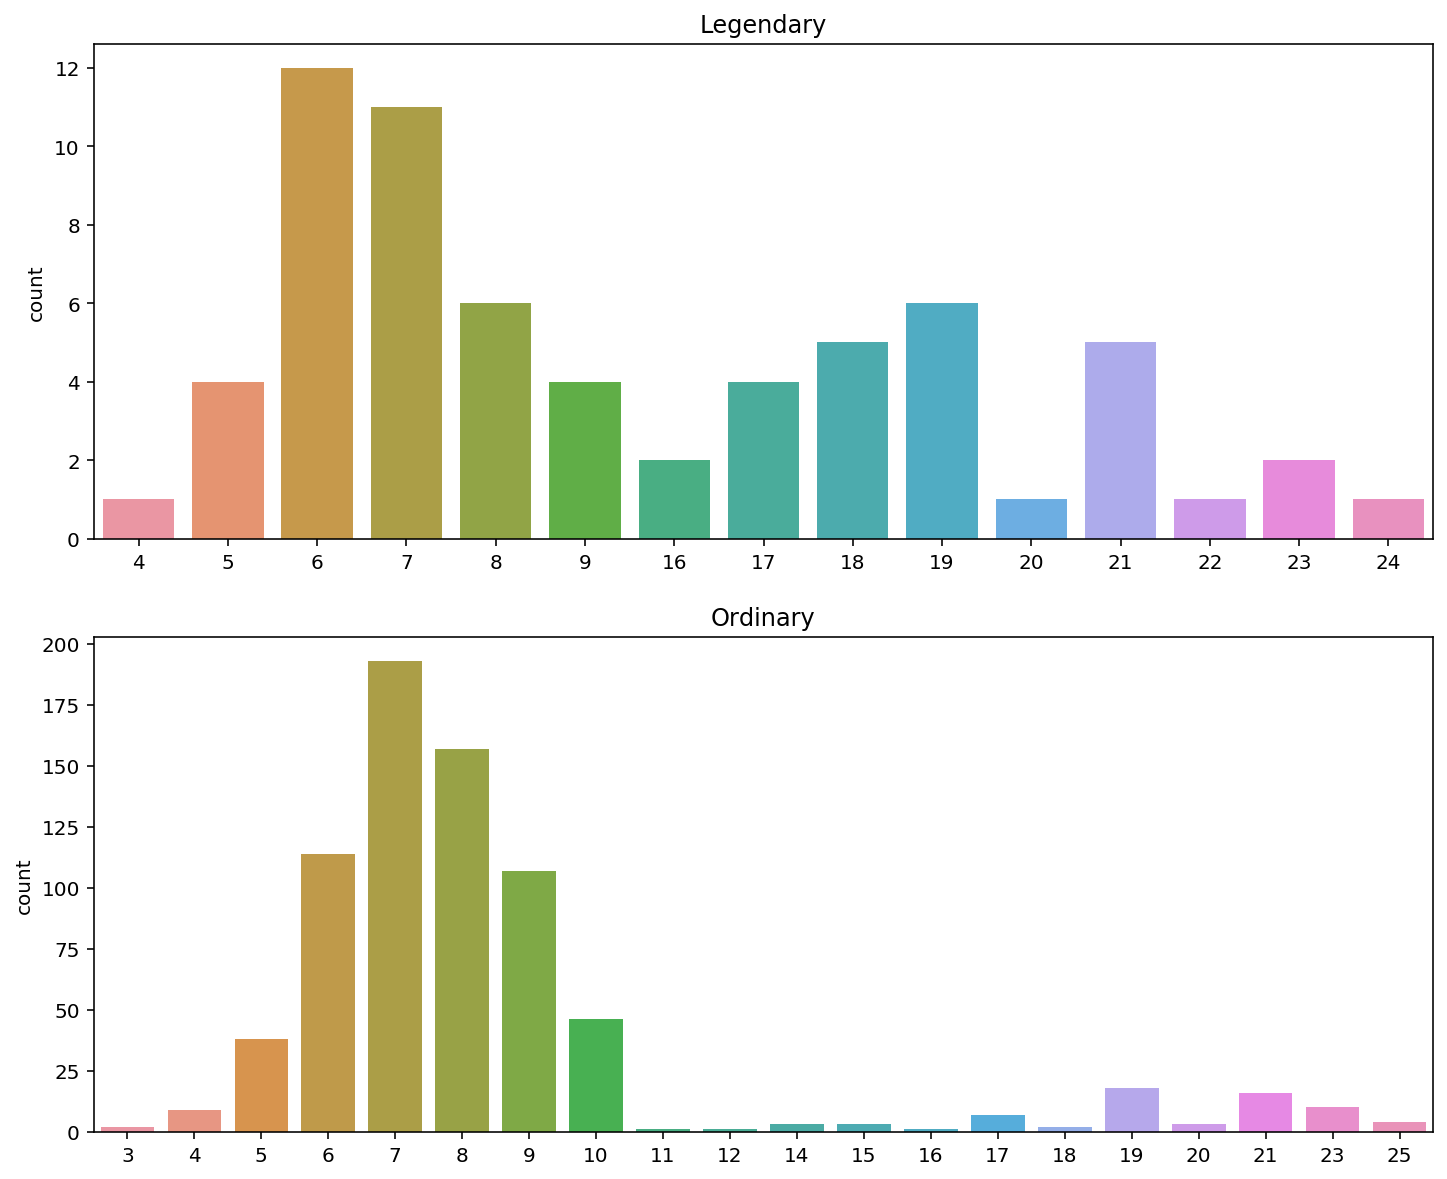

In [72]:
# 'name_count' 컬럼의 특징을 그래프로 확인

plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [73]:
# 전설의 포켓몬 이름이 10자 이상일 확률

print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [74]:
# 일반의 경우

print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


## 12-4. 모델에 넣기위해! 데이터 전처리하기 (1) 이름의 길이가 10 이상인가?

##### (1) 이름의 길이가 10 이상인가 아닌가

In [75]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [76]:
# 이름 10자 이상이면 True 넣기

pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


##### 이름에 알파벳이 아닌 문자가 들어간 경우 전처리하기
- isalpha()를 쓸 예정
- 띄어쓰기가 있어도 False 값이 나옴
- 따라서 띄어쓰기 없는 컬럼을 만들고 진행 예정

In [78]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [92]:
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [93]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [94]:
# 이 특정 9마리는 그냥 수가 적으니까 임의로 바꿔주기

pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [95]:
# 다시 isalpha로 확인하기. 
# 바꿔준 컬럼 Name 을 Name_nospace -> 다시 name_isalpha로 만들어서 체크

pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


##### 이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화하기

In [99]:
import re

In [101]:
#  예제

name = "CharizardMega Charizard X"

name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [102]:
temp = name_split[0]
temp

'CharizardMega'

In [103]:
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

In [104]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [105]:
# 위의 예제를 함수로 만들기

def tokenize(name):
    name_split = name.split(" ")
    
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
        
    return np.array(tokens)

In [106]:
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [107]:
# 전설의 포켓몬 이름들에 쓰인 토큰 추출

all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [108]:
# collection 패키지로 각각의 개수 추출

from collections import Counter

In [109]:
a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
Counter(a)

Counter({1: 4, 0: 3, 2: 1, 3: 1})

In [111]:
# 가장 많은 거 순으로 정렬해줌

Counter(a).most_common()

[(1, 4), (0, 3), (2, 1), (3, 1)]

In [112]:
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [114]:
# str.contains()를 통해 token 이 이름에 있는지 확인하고, 그 bool 여부를 담은 컬럼을 생성

for token, _ in most_common:
    pokemon[token] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


## 12-6. 모델에 넣기위해! 데이터 전처리하기 (3) Type1 & 2! 범주형 데이터 전처리하기

In [115]:
print(types)

['Dragon', 'Dark', 'Electric', 'Water', 'Steel', 'Bug', 'Fighting', 'Normal', 'Ghost', 'Flying', 'Ground', 'Fire', 'Grass', 'Rock', 'Ice', 'Fairy', 'Poison', 'Psychic']


In [116]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Dragon,Dark,Electric,Water,Steel,Bug,Fighting,Normal,Ghost,Flying,Ground,Fire,Grass,Rock,Ice,Fairy,Poison,Psychic
0,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
1,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
3,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,Fire,NaN,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


# 13. 🦄가랏, 몬스터볼! 전설의 포켓몬 찾아 삼만리(3) - 모델 구축하기

In [2]:
# previous codes required

import os
import re
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

csv_path = os.getenv("HOME") +"/desktop/Aiffel/Becoming_Kaggler/Pokemon.csv"
original_data = pd.read_csv(csv_path)
pokemon = original_data.copy()

legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)

types = list(set(pokemon["Type 1"]))
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)

formes = names[13:23]

legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))    
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))    
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())

pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())


def tokenize(name):
    name_split = name.split(" ")
    
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
        
    return np.array(tokens)

all_tokens = list(legendary["Name"].apply(tokenize).values)
token_set = []
for token in all_tokens:
    token_set.extend(token)

most_common = Counter(token_set).most_common(10)

for token, _ in most_common:
    pokemon[token] = pokemon["Name"].str.contains(token)

for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
print('슝=3')

슝=3


##### 가장 기본 데이터로 만드는 베이스라인(Baseline)

In [23]:
# 원본 데이터 갖고 오기

print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [24]:
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [25]:
# 원본에서 문자열이랑 target 데이터는 빼기

features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [26]:
target = 'Legendary'

In [27]:
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [28]:
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [29]:
# train, test로 나누기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


In [32]:
# DecisionTree 갖고 오기

from sklearn.tree import DecisionTreeClassifier
print("슝=3")

슝=3


In [33]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=25, splitter='best')

In [34]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Job done")

Job done


In [35]:
# 예측값 평가하기. 여기선 confusion_matrix로 

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

In [39]:
(confusion_matrix(y_test, y_pred)[0,0]+confusion_matrix(y_test, y_pred)[1,1])/confusion_matrix(y_test, y_pred).sum()

0.95

In [45]:
# 불균형 데이터이기 때문에(800개 중 735개가 일반포켓몬이니 그냥 다 일반포켓몬으로 찍어도 92%의 정확도가 나오기 때문에 accuracy는 좋은 지표가 아님)
# 다른 지표로 측정해보기

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



### 13-4. 가랏, 몬스터볼! (3) 피쳐 엔지니어링 데이터로 학습시키면 얼마나 차이가 날까?

In [46]:
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Dragon', 'Ground', 'Ice', 'Steel', 'Fire', 'Fairy', 'Ghost', 'Bug',
       'Poison', 'Psychic', 'Grass', 'Normal', 'Fighting', 'Dark', 'Flying',
       'Electric', 'Rock', 'Water'],
      dtype='object')


In [47]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count', 'long_name', 'Forme', 'Mega', 'Mewtwo', 'Kyurem', 'Deoxys', 'Hoopa', 
            'Latias', 'Latios', 'Kyogre', 'Groudon', 'Poison', 'Water', 'Steel', 'Grass', 
            'Bug', 'Normal', 'Fire', 'Fighting', 'Electric', 'Psychic', 'Ghost', 'Ice', 
            'Rock', 'Dark', 'Flying', 'Ground', 'Dragon', 'Fairy']

len(features)

38

In [48]:
target = "Legendary"
target

'Legendary'

In [49]:
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Electric,Psychic,Ghost,Ice,Rock,Dark,Flying,Ground,Dragon,Fairy
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,False,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,False,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,False,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,False,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [50]:
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Electric,Psychic,Ghost,Ice,Rock,Dark,Flying,Ground,Dragon,Fairy
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,False,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,False,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,False,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,False,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [53]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=25, splitter='best')

In [54]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



In [57]:
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]])

## 결론

- recall 값이 0.62 -> 0.92로 상승
- 전처리해준 데이터를 통해서 학습의 성능이 올라감을 확인